Проект модуля #3
# Дашборд конверсий
Аналитик данных

# Шаг 1
## Подготовка к работе с данными

### Загрузите данные по рекламам из csv

In [93]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
from matplotlib.dates import WeekdayLocator, MONDAY
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters
import numpy as np
from io import StringIO
from matplotlib.ticker import MultipleLocator
import os

In [94]:
url = 'https://drive.google.com/uc?id=1pwrFxZKf-fNiFwv8DIzt5bNhlzcxvmcz'
response = requests.get(url)

file_path = 'ads.csv'
with open(file_path, 'wb') as file:
    file.write(response.content)

df_ads = pd.read_csv(file_path)

df_ads.head(1000000)

,date,utm_source,utm_medium,utm_campaign,cost
0,2023-03-01T09:16:57,google,cpc,virtual_reality_workshop,238
1,2023-03-02T12:48:25,google,cpc,virtual_reality_workshop,164
2,2023-03-03T13:39:30,google,cpc,virtual_reality_workshop,240
3,2023-03-04T16:42:54,google,cpc,virtual_reality_workshop,167
4,2023-03-05T03:58:19,google,cpc,virtual_reality_workshop,268
...,...,...,...,...,...
175,2023-09-05T18:19:25,yandex,cpc,cybersecurity_special,221
176,2023-09-06T19:57:25,yandex,cpc,cybersecurity_special,124
177,2023-09-07T16:04:38,yandex,cpc,cybersecurity_special,211
178,2023-09-08T23:56:00,yandex,cpc,cybersecurity_special,195


### Изучите данные, сделайте предварительный анализ с помощью dataframe.describe

In [95]:
df_ads.describe(include='all')

,date,utm_source,utm_medium,utm_campaign,cost
count,180,180,180,180,180.000000
unique,180,4,2,5,NaN
top,2023-03-01T09:16:57,yandex,cpc,cybersecurity_special,NaN
freq,1,79,115,43,NaN
mean,NaN,NaN,NaN,NaN,192.533333
std,NaN,NaN,NaN,NaN,57.017335
min,NaN,NaN,NaN,NaN,100.000000
25%,NaN,NaN,NaN,NaN,143.750000
50%,NaN,NaN,NaN,NaN,181.500000
75%,NaN,NaN,NaN,NaN,241.250000


### Визиты из CSV

In [96]:
df_visits_csv = pd.read_csv("https://drive.google.com/uc?id=1QosQQ4RRNR9rkL4t7sB707h2Uy0XfYJe")

df_visits_csv.head(1000000)


,uuid,platform,user_agent,date
0,1de9ea66-70d3-4a1f-8735-df5ef7697fb9,web,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2...,2023-03-01T13:29:22
1,f149f542-e935-4870-9734-6b4501eaf614,web,Mozilla/5.0 (X11; CrOS x86_64 8172.45.0) Apple...,2023-03-01T16:44:28
2,f149f542-e935-4870-9734-6b4501eaf614,web,Mozilla/5.0 (X11; CrOS x86_64 8172.45.0) Apple...,2023-03-06T06:12:36
3,08f0ebd4-950c-4dd9-8e97-b5bdf073eed1,web,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:109...,2023-03-01T20:16:37
4,08f0ebd4-950c-4dd9-8e97-b5bdf073eed1,web,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:109...,2023-03-05T17:42:47
...,...,...,...,...
995,8bc047ac-dc03-4a61-8037-7371f729fa34,web,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:15....,2023-03-02T23:57:06
996,8bc047ac-dc03-4a61-8037-7371f729fa34,web,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:15....,2023-03-07T23:05:08
997,3f78ac76-6f81-43ec-85e8-f3cf74fc8fdc,web,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,2023-03-02T12:47:09
998,3f78ac76-6f81-43ec-85e8-f3cf74fc8fdc,web,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,2023-03-07T00:07:34


In [97]:
df_visits_csv.describe(include='all')

,uuid,platform,user_agent,date
count,1000,1000,1000,1000
unique,519,3,28,996
top,251a0926-ece3-4d77-aa42-ab569fdf9fe2,web,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,2023-03-01T08:01:45
freq,4,954,71,2


### Регистрации из CSV

In [98]:
df_registrations_csv = pd.read_csv("https://drive.google.com/uc?id=1AeQz0kaSgz0lxYSDtuNm36muhy5fRCzZ")

df_registrations_csv.head(1000000)

,date,user_id,email,platform,registration_type
0,2023-03-01T00:25:39,8838849,joseph95@example.org,web,google
1,2023-03-01T14:53:01,8741065,janetsuarez@example.net,web,yandex
2,2023-03-01T14:27:36,1866654,robert67@example.org,web,google
3,2023-03-01T02:42:34,1577584,elam@example.net,web,apple
4,2023-03-01T10:27:14,4765395,stephanie68@example.net,web,yandex
...,...,...,...,...,...
995,2023-03-05T03:19:40,6414793,jerryrivera@example.com,android,google
996,2023-03-05T15:03:48,53167,laura65@example.net,android,google
997,2023-03-05T09:51:08,4969623,jasmine42@example.net,android,email
998,2023-03-05T16:25:59,7636873,imclaughlin@example.net,android,google


In [99]:
df_registrations_csv.describe(include='all')

,date,user_id,email,platform,registration_type
count,1000,1.000000e+03,1000,1000,1000
unique,1000,NaN,997,3,4
top,2023-03-01T00:25:39,NaN,zanderson@example.org,android,email
freq,1,NaN,2,517,446
mean,NaN,4.488623e+06,NaN,NaN,NaN
std,NaN,2.620568e+06,NaN,NaN,NaN
min,NaN,2.236800e+04,NaN,NaN,NaN
25%,NaN,2.235489e+06,NaN,NaN,NaN
50%,NaN,4.473044e+06,NaN,NaN,NaN
75%,NaN,6.779707e+06,NaN,NaN,NaN


# Шаг 2
## Запросы к API
### Запросите данные по API за период 2023-03-01 -> 2023-09-01

### Визиты

In [100]:
#START = "2023-03-01"
#END = "2023-09-01"


API_URL = "https://data-charts-api.hexlet.app"
DATE_BEGIN = '2023-03-01'
DATE_END = '2023-09-01'

In [101]:
response = requests.get(f"{API_URL}/visits?begin={DATE_BEGIN}&end={DATE_END}")

data = response.json()

df_visits = pd.DataFrame(data)

df_visits.head(1000000)

,datetime,platform,user_agent,visit_id
0,"Wed, 01 Mar 2023 23:17:37 GMT",web,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,1de9ea66-70d3-4a1f-8735-df5ef7697fb9
1,"Sat, 04 Mar 2023 03:23:34 GMT",web,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,1de9ea66-70d3-4a1f-8735-df5ef7697fb9
2,"Wed, 01 Mar 2023 12:57:13 GMT",web,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,f149f542-e935-4870-9734-6b4501eaf614
3,"Wed, 01 Mar 2023 13:07:19 GMT",web,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,08f0ebd4-950c-4dd9-8e97-b5bdf073eed1
4,"Sun, 05 Mar 2023 22:02:39 GMT",web,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,08f0ebd4-950c-4dd9-8e97-b5bdf073eed1
...,...,...,...,...
308866,"Sun, 27 Aug 2023 17:38:56 GMT",web,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,553eb09f-8809-429f-8f01-876f18305c96
308867,"Sun, 27 Aug 2023 03:54:11 GMT",web,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,cc664f35-6248-4953-81fd-1661cb91485c
308868,"Tue, 29 Aug 2023 00:33:03 GMT",web,Mozilla/5.0 (Windows NT 10.0; WOW64; Trident/7...,99f32105-05b7-424e-ab3c-b3630e892d21
308869,"Wed, 30 Aug 2023 07:46:24 GMT",web,Mozilla/5.0 (Windows NT 10.0; WOW64; Trident/7...,99f32105-05b7-424e-ab3c-b3630e892d21


In [102]:
df_visits.describe(include='all')

,datetime,platform,user_agent,visit_id
count,308871,308871,308871,308871
unique,303530,4,32,170101
top,"Tue, 14 Mar 2023 13:31:26 GMT",web,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,5f260cd8-3c51-41fe-a394-8f5213d58793
freq,4,278078,15679,4


### Регистрации

In [103]:
response = requests.get(f"{API_URL}/registrations?begin={DATE_BEGIN}&end={DATE_END}")

data = response.json()

df_registrations = pd.DataFrame(data)

df_registrations.head(1000000)

,datetime,email,platform,registration_type,user_id
0,"Wed, 01 Mar 2023 13:21:20 GMT",jlane@example.net,web,google,8dd9b457-f02e-4cff-a66a-d70838849f04
1,"Wed, 01 Mar 2023 01:14:06 GMT",dyerkenneth@example.net,web,yandex,52e2b626-c6fa-4919-a67d-09adb33accdc
2,"Wed, 01 Mar 2023 19:47:32 GMT",kwade@example.com,web,yandex,bab974bd-2176-4497-acb2-4bc61ca93f5c
3,"Wed, 01 Mar 2023 19:19:26 GMT",fisherbrian@example.net,web,email,b517892a-15c0-4320-9f33-e65db1110395
4,"Wed, 01 Mar 2023 02:30:54 GMT",johngomez@example.org,web,google,bd38427f-7120-4c14-a384-889a2335108b
...,...,...,...,...,...
28192,"Thu, 31 Aug 2023 20:51:43 GMT",lunazachary@example.com,ios,email,7065467a-39d2-46c7-9041-ed7fbc8d801f
28193,"Thu, 31 Aug 2023 23:07:32 GMT",amyramirez@example.org,ios,apple,93a04829-5ab4-48b5-abf9-8e267150c512
28194,"Thu, 31 Aug 2023 14:56:54 GMT",webermark@example.org,ios,apple,6ff0e3b5-af42-42ba-ae6e-395051d79360
28195,"Thu, 31 Aug 2023 22:52:45 GMT",alexandermichael@example.com,ios,email,6d8b00e7-4696-43b1-8d79-91f2b7bef9cd


In [104]:
df_registrations.describe(include='all')

,datetime,email,platform,registration_type,user_id
count,28197,28197,28197,28197,28197
unique,28143,26707,3,4,28197
top,"Tue, 14 Mar 2023 18:21:50 GMT",yjones@example.net,android,email,8dd9b457-f02e-4cff-a66a-d70838849f04
freq,2,6,13760,11977,1


# Шаг 3

## Расчет метрик

### Сгруппируйте данные визитов по датам и платформам

In [105]:
response = requests.get(f"{API_URL}/visits?begin={DATE_BEGIN}&end={DATE_END}")
data = response.json()

df_visits = pd.DataFrame(data)

df_visits['datetime'] = pd.to_datetime(df_visits['datetime'])

idx = df_visits.groupby('visit_id')['datetime'].idxmax()

df_filtered_visits = df_visits.loc[idx]

df_filtered_visits = df_filtered_visits[~df_filtered_visits['user_agent'].str.contains('bot', case=False)]

df_filtered_visits['datetime'] = df_filtered_visits['datetime'].dt.strftime('%Y-%m-%d')

df_grouped = df_filtered_visits.groupby(['datetime', 'platform']).size().reset_index(name='visits')

df_grouped.columns = ['date_group', 'platform', 'visits']

df_visit_grouped = df_grouped.sort_values(by='date_group')

df_visit_grouped.head(1000000)

,date_group,platform,visits
0,2023-03-01,android,264
1,2023-03-01,ios,78
2,2023-03-01,web,333
3,2023-03-02,android,106
4,2023-03-02,ios,103
...,...,...,...
546,2023-08-30,android,47
548,2023-08-30,web,653
550,2023-08-31,ios,16
549,2023-08-31,android,80


In [106]:
df_visit_grouped.describe(include='all')

,date_group,platform,visits
count,552,552,552.000000
unique,184,3,NaN
top,2023-03-01,android,NaN
freq,3,184,NaN
mean,NaN,NaN,295.528986
std,NaN,NaN,524.904616
min,NaN,NaN,1.000000
25%,NaN,NaN,28.000000
50%,NaN,NaN,73.500000
75%,NaN,NaN,397.500000


### Сгруппируйте также данные регистраций по датам и платформам

In [107]:
response = requests.get(f"{API_URL}/registrations?begin={DATE_BEGIN}&end={DATE_END}")
data = response.json()

df_registrations = pd.DataFrame(data)

df_registrations['date_group'] = pd.to_datetime(df_registrations['datetime']).dt.strftime('%Y-%m-%d')

df_grouped = df_registrations.groupby(['date_group', 'platform']).size().reset_index(name='registrations')

df_registrations_grouped = df_grouped.sort_values(by=['date_group'])

df_registrations_grouped.head(1000000)

,date_group,platform,registrations
0,2023-03-01,android,218
1,2023-03-01,ios,67
2,2023-03-01,web,78
3,2023-03-02,android,91
4,2023-03-02,ios,76
...,...,...,...
546,2023-08-30,android,40
548,2023-08-30,web,18
550,2023-08-31,ios,13
549,2023-08-31,android,67


In [108]:
df_registrations_grouped.describe(include='all')

,date_group,platform,registrations
count,552,552,552.000000
unique,184,3,NaN
top,2023-03-01,android,NaN
freq,3,184,NaN
mean,NaN,NaN,51.081522
std,NaN,NaN,58.226127
min,NaN,NaN,1.000000
25%,NaN,NaN,17.000000
50%,NaN,NaN,31.000000
75%,NaN,NaN,63.000000


### Объедините датайфреймы, сделайте итоговый датафрейм с расчетом конверсии

### Сохраните датафрейм в формате JSON conversion.json

In [109]:
result_df = pd.merge(df_visit_grouped, df_registrations_grouped, on=['date_group', 'platform'], how='outer')

result_df['conversion'] = (result_df['registrations'] / result_df['visits']) * 100

result_df['conversion'] = result_df['conversion'].round(2)

df_conversion = result_df.sort_values(by='date_group')

df_conversion.to_json('conversion.json')

df_conversion.head(1000000)

,date_group,platform,visits,registrations,conversion
0,2023-03-01,android,264,218,82.58
1,2023-03-01,ios,78,67,85.90
2,2023-03-01,web,333,78,23.42
3,2023-03-02,android,106,91,85.85
4,2023-03-02,ios,103,76,73.79
...,...,...,...,...,...
546,2023-08-30,ios,40,32,80.00
548,2023-08-30,web,653,18,2.76
550,2023-08-31,android,80,67,83.75
549,2023-08-31,ios,16,13,81.25


In [110]:
df_conversion.describe(include='all')

,date_group,platform,visits,registrations,conversion
count,552,552,552.000000,552.000000,552.000000
unique,184,3,NaN,NaN,NaN
top,2023-03-01,android,NaN,NaN,NaN
freq,3,184,NaN,NaN,NaN
mean,NaN,NaN,295.528986,51.081522,57.650815
std,NaN,NaN,524.904616,58.226127,38.173042
min,NaN,NaN,1.000000,1.000000,1.090000
25%,NaN,NaN,28.000000,17.000000,7.935000
50%,NaN,NaN,73.500000,31.000000,76.330000
75%,NaN,NaN,397.500000,63.000000,84.850000


# Шаг 4

## Добавляем рекламы

### В этом шаге добавим данные по рекламным кампаниям

In [111]:
df_ads['date'] = pd.to_datetime(df_ads['date'])

df_ads['date'] = df_ads['date'].dt.strftime('%Y-%m-%d')

df_ads.rename(columns={'date': 'date_group'}, inplace=True)

df_ads.head(1000000)

,date_group,utm_source,utm_medium,utm_campaign,cost
0,2023-03-01,google,cpc,virtual_reality_workshop,238
1,2023-03-02,google,cpc,virtual_reality_workshop,164
2,2023-03-03,google,cpc,virtual_reality_workshop,240
3,2023-03-04,google,cpc,virtual_reality_workshop,167
4,2023-03-05,google,cpc,virtual_reality_workshop,268
...,...,...,...,...,...
175,2023-09-05,yandex,cpc,cybersecurity_special,221
176,2023-09-06,yandex,cpc,cybersecurity_special,124
177,2023-09-07,yandex,cpc,cybersecurity_special,211
178,2023-09-08,yandex,cpc,cybersecurity_special,195


In [112]:
df_ads.describe(include='all')

,date_group,utm_source,utm_medium,utm_campaign,cost
count,180,180,180,180,180.000000
unique,180,4,2,5,NaN
top,2023-03-01,yandex,cpc,cybersecurity_special,NaN
freq,1,79,115,43,NaN
mean,NaN,NaN,NaN,NaN,192.533333
std,NaN,NaN,NaN,NaN,57.017335
min,NaN,NaN,NaN,NaN,100.000000
25%,NaN,NaN,NaN,NaN,143.750000
50%,NaN,NaN,NaN,NaN,181.500000
75%,NaN,NaN,NaN,NaN,241.250000


In [113]:
df_ads.rename(columns={'date': 'date_group', 'utm_campaign': 'campaign'}, inplace=True)

df_ads_group = df_ads.groupby(['date_group', 'campaign']).agg({
    'cost': 'sum'
}).reset_index()[['date_group', 'cost', 'campaign']]

df_ads_group.head(1000000)

,date_group,cost,campaign
0,2023-03-01,238,virtual_reality_workshop
1,2023-03-02,164,virtual_reality_workshop
2,2023-03-03,240,virtual_reality_workshop
3,2023-03-04,167,virtual_reality_workshop
4,2023-03-05,268,virtual_reality_workshop
...,...,...,...
175,2023-09-05,221,cybersecurity_special
176,2023-09-06,124,cybersecurity_special
177,2023-09-07,211,cybersecurity_special
178,2023-09-08,195,cybersecurity_special


In [114]:
df_ads_group.describe(include='all')

,date_group,cost,campaign
count,180,180.000000,180
unique,180,NaN,5
top,2023-03-01,NaN,cybersecurity_special
freq,1,NaN,43
mean,NaN,192.533333,NaN
std,NaN,57.017335,NaN
min,NaN,100.000000,NaN
25%,NaN,143.750000,NaN
50%,NaN,181.500000,NaN
75%,NaN,241.250000,NaN


In [115]:
df_out = pd.merge(df_ads_group, df_conversion, on='date_group', how='outer', suffixes=('_ads', '_conversion'))
df_out['cost'].fillna(0, inplace=True)

df_out['utm_campaign'] = df_out['campaign']
column_order = ['date_group', 'visits', 'registrations', 'conversion', 'cost', 'utm_campaign']
df_out = df_out[column_order]

df_out.loc[df_out['utm_campaign'].isnull(), 'utm_campaign'] = 'none'

df_out.sort_values(by='date_group', inplace=True)
df_out.reset_index(drop=True, inplace=True)
DATE_BEGIN = pd.to_datetime("2023-03-01")
END = pd.to_datetime("2023-09-01") - pd.Timedelta(days=1)
df_out['date_group'] = pd.to_datetime(df_out['date_group'])
df_out = df_out[(df_out['date_group'] >= DATE_BEGIN) & (df_out['date_group'] <= DATE_END)]

df_out.head(1000000)

,date_group,visits,registrations,conversion,cost,utm_campaign
0,2023-03-01,264.0,218.0,82.58,238.0,virtual_reality_workshop
1,2023-03-01,78.0,67.0,85.90,238.0,virtual_reality_workshop
2,2023-03-01,333.0,78.0,23.42,238.0,virtual_reality_workshop
3,2023-03-02,106.0,91.0,85.85,164.0,virtual_reality_workshop
4,2023-03-02,103.0,76.0,73.79,164.0,virtual_reality_workshop
...,...,...,...,...,...,...
548,2023-08-30,47.0,40.0,85.11,130.0,cybersecurity_special
549,2023-08-31,80.0,67.0,83.75,192.0,cybersecurity_special
550,2023-08-31,16.0,13.0,81.25,192.0,cybersecurity_special
551,2023-08-31,688.0,23.0,3.34,192.0,cybersecurity_special


In [116]:
df_out.describe(include='all')

,date_group,visits,registrations,conversion,cost,utm_campaign
count,553,552.000000,552.000000,552.000000,553.000000,553
unique,NaN,NaN,NaN,NaN,NaN,6
top,NaN,NaN,NaN,NaN,NaN,virtual_reality_workshop
freq,NaN,NaN,NaN,NaN,NaN,108
mean,2023-05-31 16:00:52.079566080,295.528986,51.081522,57.650815,179.981917,NaN
min,2023-03-01 00:00:00,1.000000,1.000000,1.090000,0.000000,NaN
25%,2023-04-16 00:00:00,28.000000,17.000000,7.935000,135.000000,NaN
50%,2023-06-01 00:00:00,73.500000,31.000000,76.330000,179.000000,NaN
75%,2023-07-17 00:00:00,397.500000,63.000000,84.850000,240.000000,NaN
max,2023-09-01 00:00:00,3583.000000,338.000000,180.000000,300.000000,NaN


In [117]:
#df_out.to_json("out.json", orient='records', lines=True)
df_out.to_json("ads.json")

# Шаг 5

## Визуализация

### Итоговые визиты

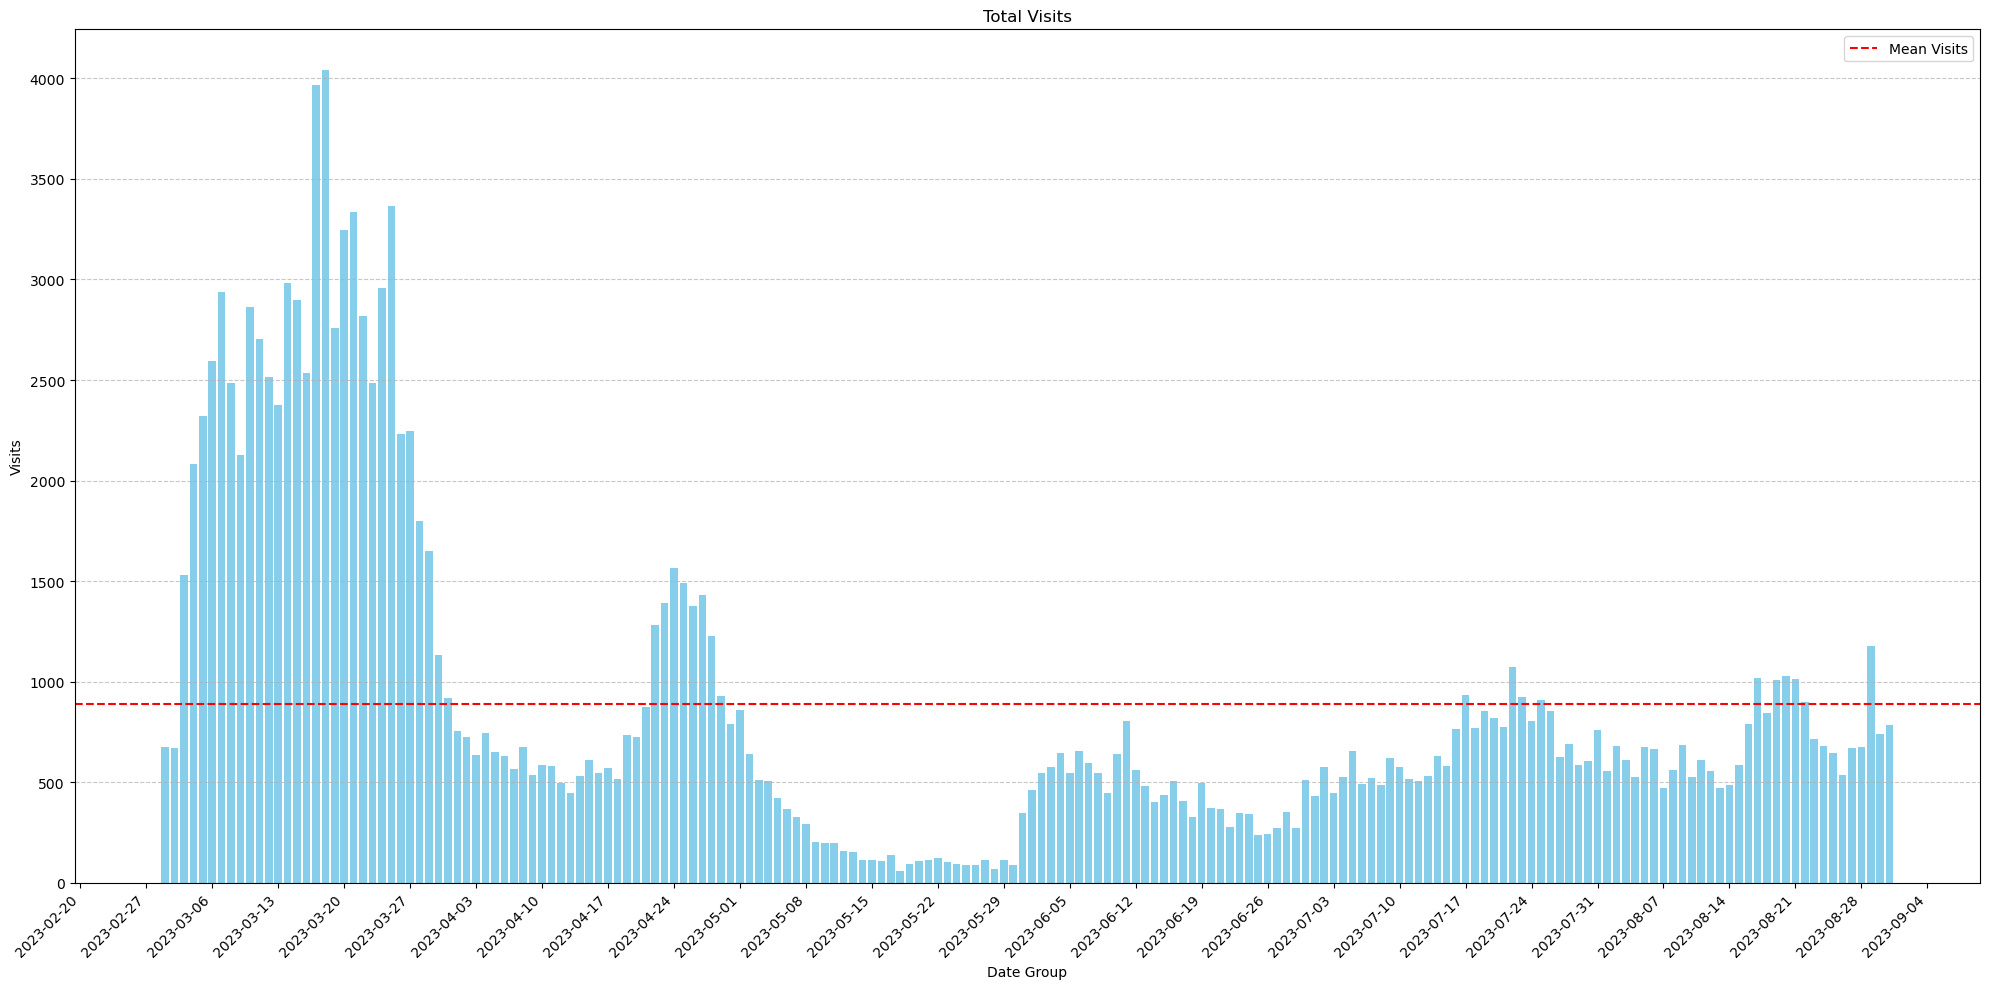

In [118]:
df_graf_visit_grouped = df_visit_grouped.copy(deep=True)

result_df = df_graf_visit_grouped.groupby('date_group')['visits'].sum().reset_index()
result_df['date_group'] = pd.to_datetime(result_df['date_group'])

plt.figure(figsize=(20, 10))
plt.bar(result_df['date_group'], result_df['visits'], color='skyblue')

plt.xlabel('Date Group')
plt.ylabel('Visits')
plt.title('Total Visits')

mondays = WeekdayLocator(MONDAY)
plt.gca().xaxis.set_major_locator(mondays)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.xticks(rotation=45, ha='right')

mean_value = result_df['visits'].mean()
plt.axhline(y=mean_value, color='red', linestyle='--', label='Mean Visits')

plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.legend()
plt.tight_layout()

plt.savefig('charts/total_visits_chart.png', bbox_inches='tight')

plt.show()

### Итоговые визиты с разбивкой по платформам: web, android, ios, bot

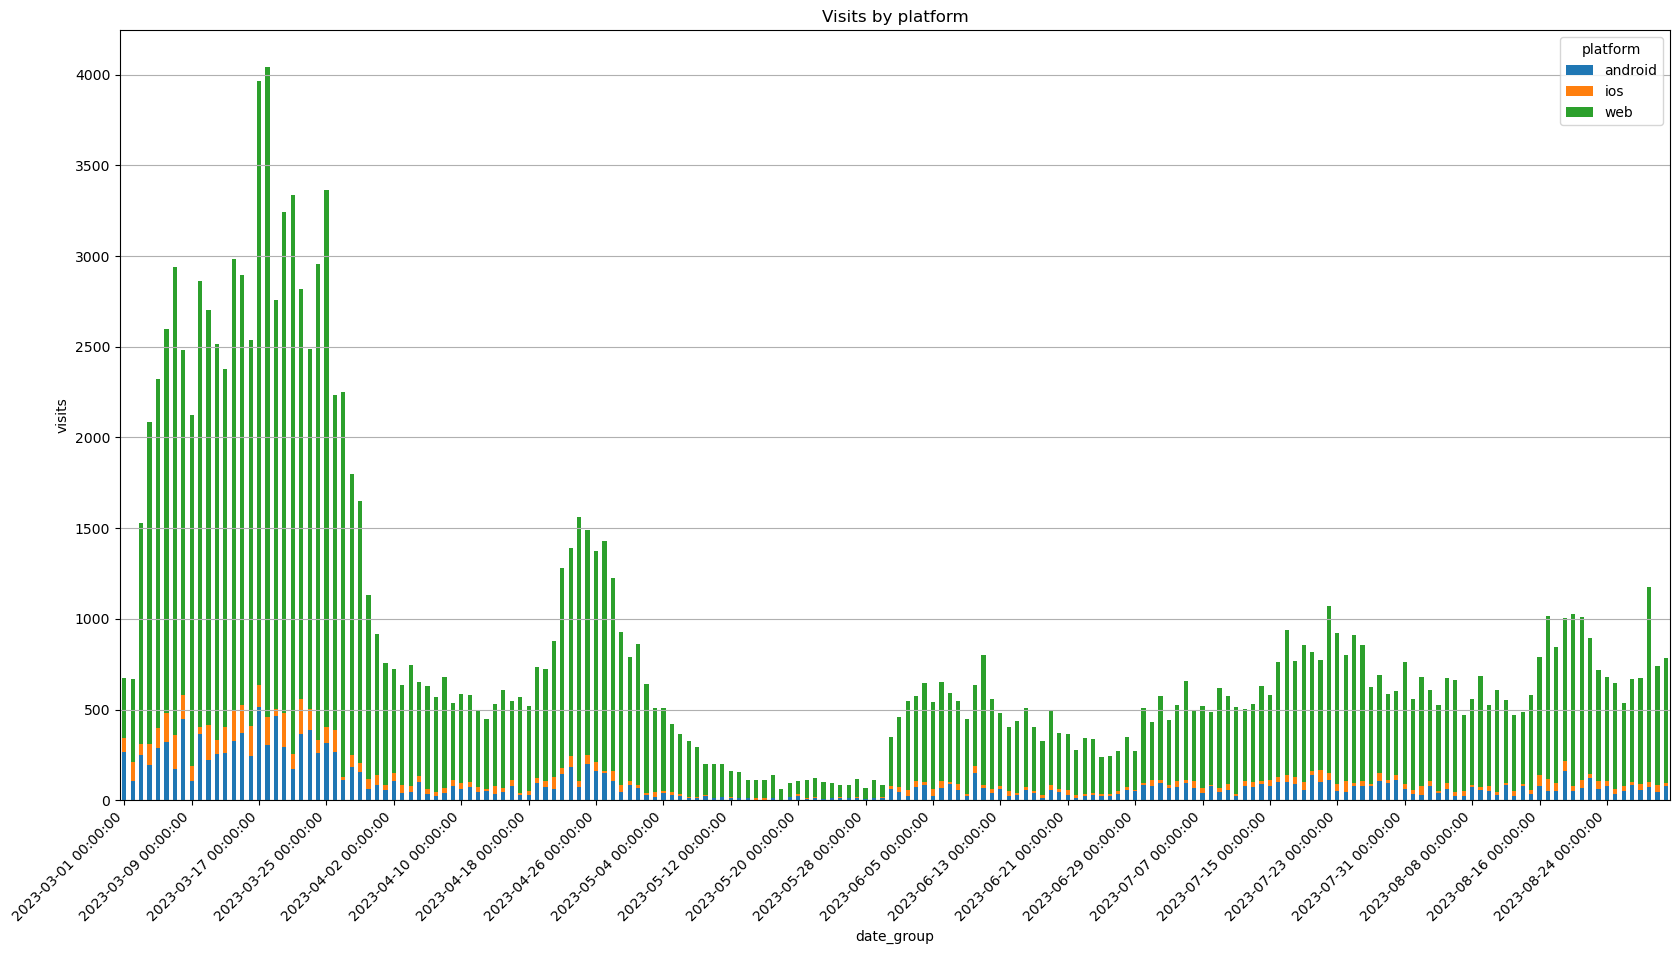

In [119]:
df_graf_visit_grouped_platform = df_visit_grouped.copy(deep=True)

df_graf_visit_grouped_platform['date_group'] = pd.to_datetime(df_graf_visit_grouped_platform['date_group'])

fig, ax = plt.subplots(figsize=(20, 10))

df_graf_visit_grouped_platform.groupby(['date_group', 'platform']).sum()['visits'].unstack().plot(kind='bar', stacked=True, ax=ax)

ax.set_xlabel('date_group')
ax.set_ylabel('visits')
ax.set_title('Visits by platform')

ax.legend(title='platform')

ax.yaxis.grid(True)

plt.xticks(rotation=45, ha='right')

ax.xaxis.set_major_locator(plt.MaxNLocator(30))

plt.savefig('charts/total_visits_platform_chart.png', bbox_inches='tight')

plt.show()

### Итоговые регистрации

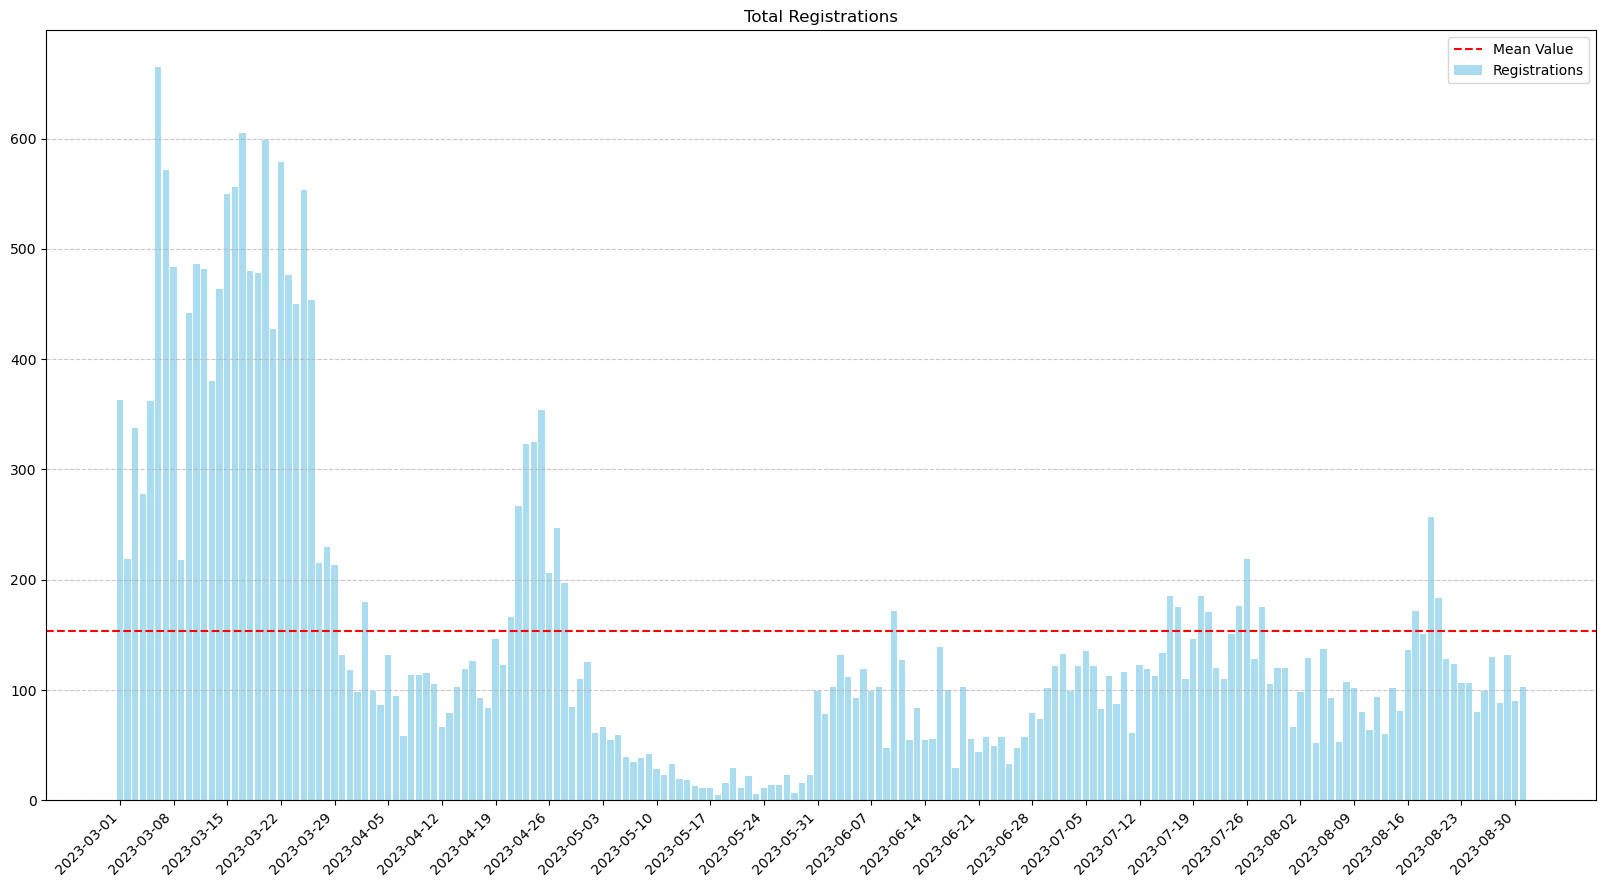

In [120]:
df_graf_registrations_grouped = df_registrations_grouped.copy(deep=True)

df_graf_registrations_grouped = df_graf_registrations_grouped.groupby('date_group')['registrations'].sum().reset_index()

plt.figure(figsize=(20, 10))

plt.bar(df_graf_registrations_grouped['date_group'], df_graf_registrations_grouped['registrations'], color='skyblue', alpha=0.7, label='Registrations')

mean_value = df_graf_registrations_grouped['registrations'].mean()
plt.axhline(y=mean_value, color='red', linestyle='--', label='Mean Value')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.title('Total Registrations')

plt.xticks(df_graf_registrations_grouped['date_group'][::7], rotation=45, ha='right')

plt.legend()

plt.savefig('charts/total_registrations_chart.png')

plt.show()


### Итоговые регистрации с разбивкой по платформе: web, android, ios

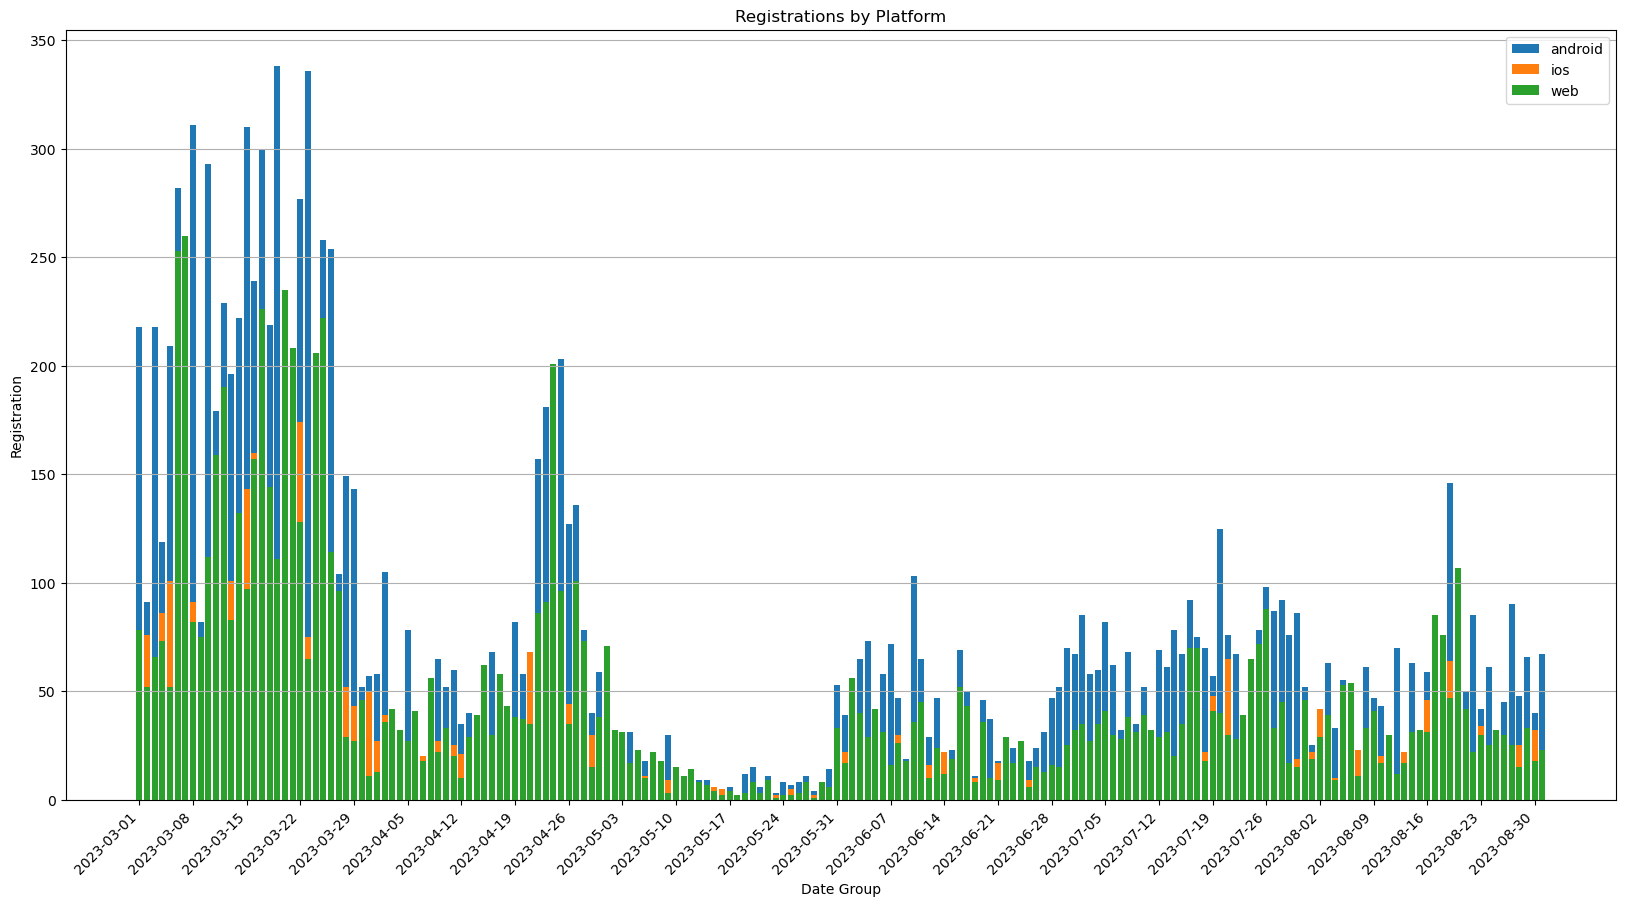

In [121]:
df_registrations_copy = df_registrations.copy(deep=True)

df_registrations_copy['date_group'] = pd.to_datetime(df_registrations_copy['datetime'], format='%a, %d %b %Y %H:%M:%S GMT').dt.strftime('%Y-%m-%d')

grouped_df = df_registrations_copy.groupby(['date_group', 'platform']).size().reset_index(name='registration')

fig, ax = plt.subplots(figsize=(20, 10))

for platform in grouped_df['platform'].unique():
    platform_data = grouped_df[grouped_df['platform'] == platform]
    ax.bar(platform_data['date_group'], platform_data['registration'], label=platform)

ax.set_xlabel('Date Group')
ax.set_ylabel('Registration')
ax.set_title('Registrations by Platform')
ax.legend()

ax.grid(True, axis='y')

x_labels = grouped_df['date_group'].unique()[::7]
ax.set_xticks(x_labels)
ax.set_xticklabels(x_labels, rotation=45, ha='right')

plt.savefig('charts/total_registrations_platform_chart.png')

plt.show()

### Итоговые регистрации с разбивкой по типу регистрации: email, google, apple, yandex

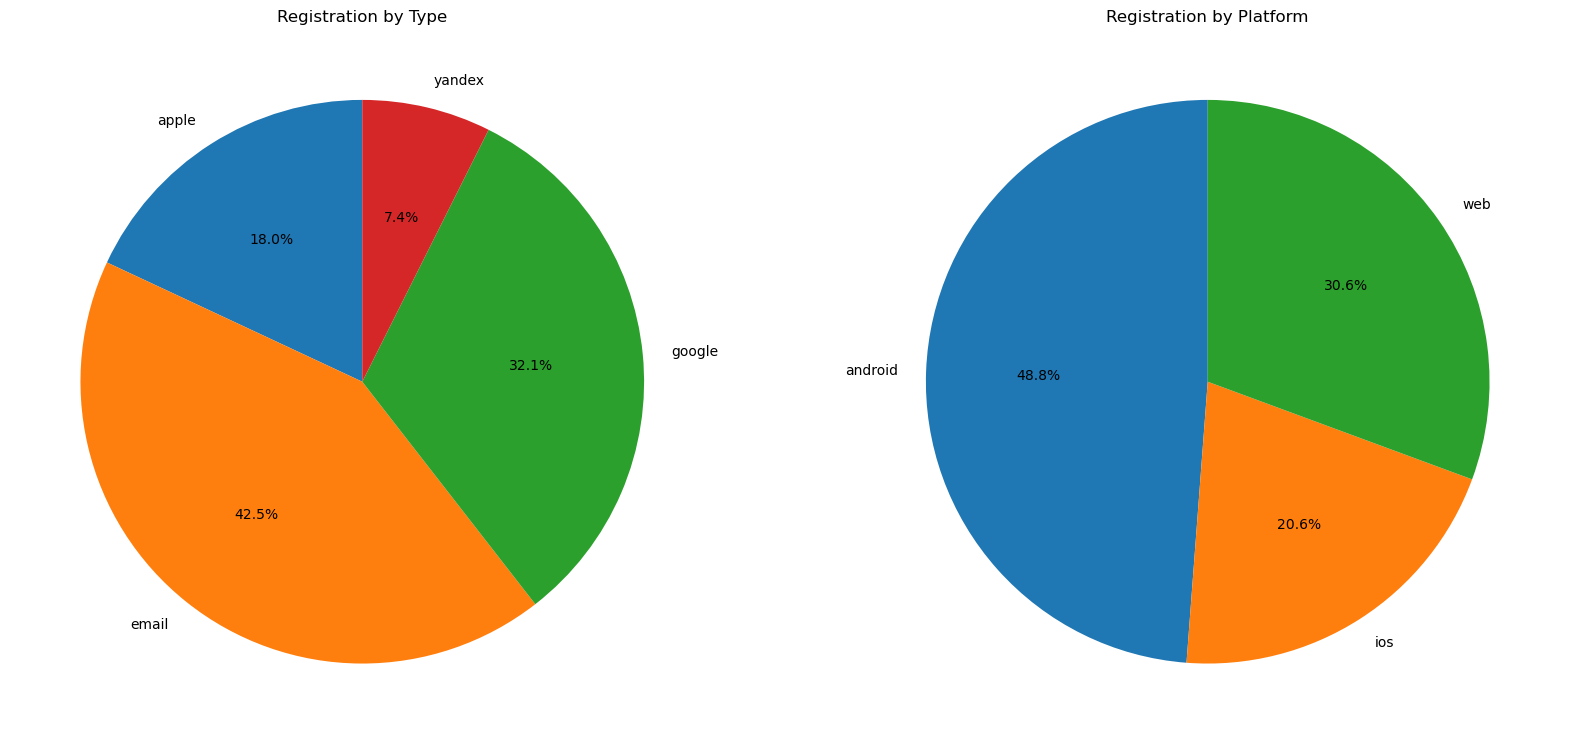

In [122]:
df_graf_registration_type_copy = df_registrations.copy(deep=True)
df_graf_registration_platform_copy = df_registrations.copy(deep=True)

df_graf_registration_type_copy = df_graf_registration_type_copy.groupby('registration_type').size().reset_index(name='registration')
df_graf_registration_platform_copy = df_graf_registration_platform_copy.groupby('platform').size().reset_index(name='registration')

fig, ax = plt.subplots(1, 2, figsize=(20, 10))

ax[0].pie(df_graf_registration_type_copy['registration'], labels=df_graf_registration_type_copy['registration_type'], autopct='%1.1f%%', startangle=90)
ax[0].set_title('Registration by Type')
#ax[0].tick_params(axis='both', labelsize=200)

ax[1].pie(df_graf_registration_platform_copy['registration'], labels=df_graf_registration_platform_copy['platform'], autopct='%1.1f%%', startangle=90)
ax[1].set_title('Registration by Platform')
ax[1].tick_params(axis='both', labelsize=14)

plt.savefig('charts/registration_type_platform_chart.png')

plt.show()

### Конверсия по каждой платформе

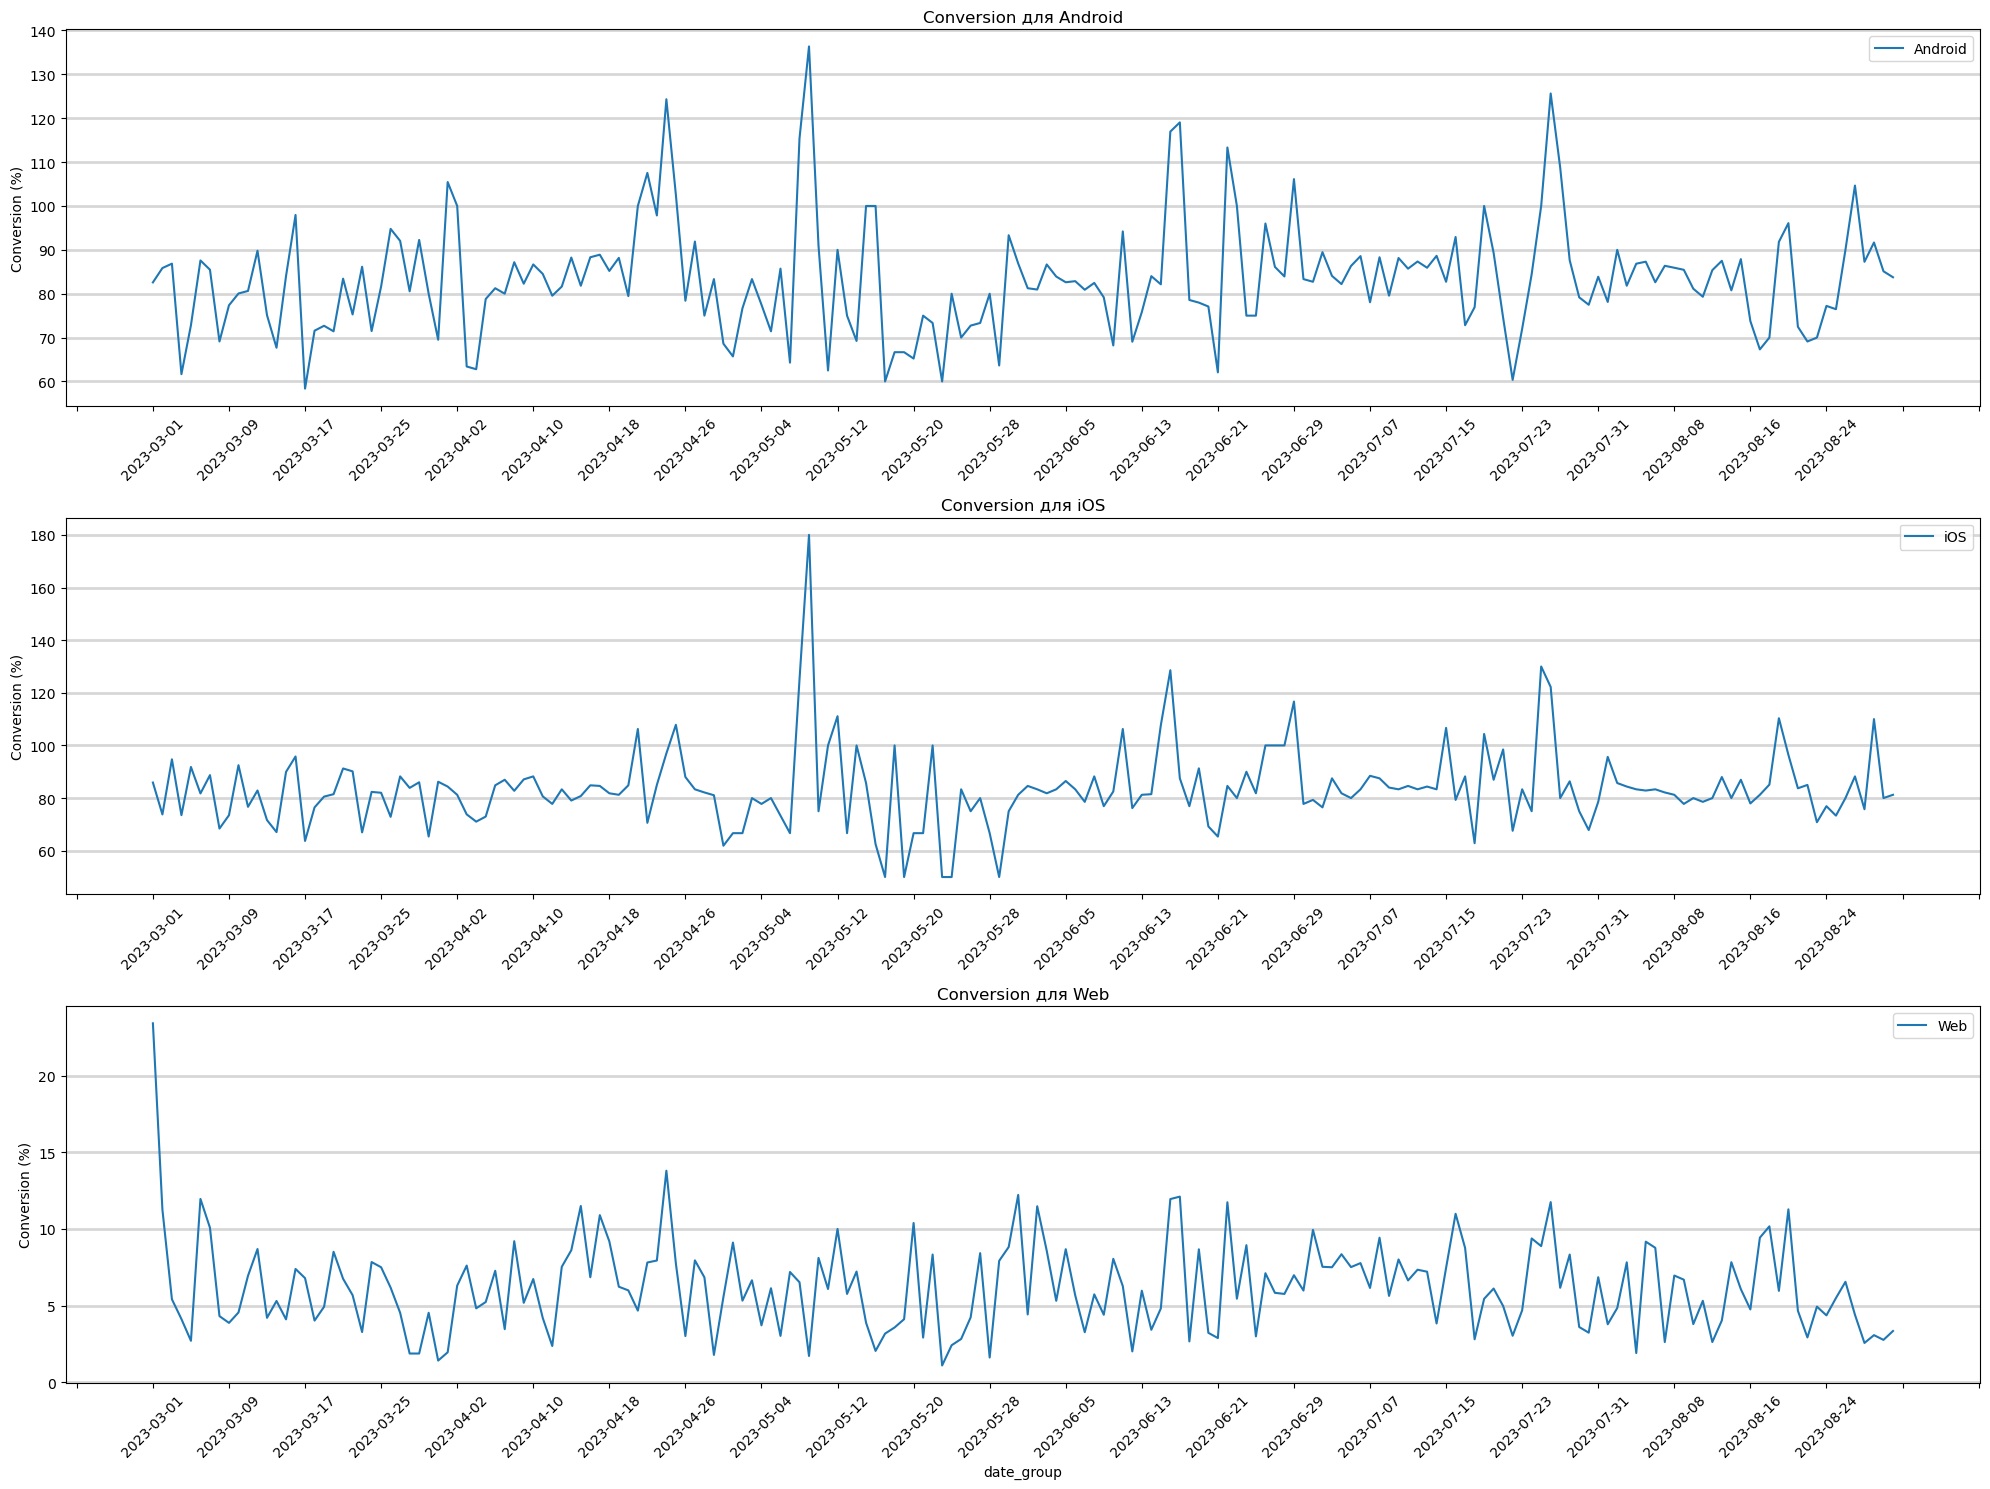

In [123]:
df_conversion_copy = df_conversion.copy(deep=True)

android_data = df_conversion_copy[df_conversion_copy['platform'] == 'android']
ios_data = df_conversion_copy[df_conversion_copy['platform'] == 'ios']
web_data = df_conversion_copy[df_conversion_copy['platform'] == 'web']

fig, axs = plt.subplots(3, 1, figsize=(20, 15), sharex=False, sharey=False)

axs[0].plot(android_data['date_group'], android_data['conversion'], label='Android')
axs[0].set_title('Conversion для Android')
axs[0].set_ylabel('Conversion (%)')
axs[0].legend()
axs[0].grid(True, linestyle='-', linewidth=2, alpha=0.5, which='both', axis='y', markevery=2)
axs[0].tick_params(axis='x', rotation=45)  # Поворот меток оси x
axs[0].xaxis.set_major_locator(plt.MaxNLocator(nbins=30))

axs[1].plot(ios_data['date_group'], ios_data['conversion'], label='iOS')
axs[1].set_title('Conversion для iOS')
axs[1].set_ylabel('Conversion (%)')
axs[1].legend()
axs[1].grid(True, linestyle='-', linewidth=2, alpha=0.5, which='both', axis='y', markevery=2)
axs[1].tick_params(axis='x', rotation=45) 
axs[1].xaxis.set_major_locator(plt.MaxNLocator(nbins=30)) 

axs[2].plot(web_data['date_group'], web_data['conversion'], label='Web')
axs[2].set_title('Conversion для Web')
axs[2].set_xlabel('date_group')
axs[2].set_ylabel('Conversion (%)')
axs[2].legend()
axs[2].grid(True, linestyle='-', linewidth=2, alpha=0.5, which='both', axis='y', markevery=2)
axs[2].tick_params(axis='x', rotation=45) 
axs[2].xaxis.set_major_locator(plt.MaxNLocator(nbins=30))

plt.tight_layout()

plt.savefig('charts/conversion_platform_chart.png')

plt.show()

### Средняя конверсия <span style="color:red;">(Общая)</span>


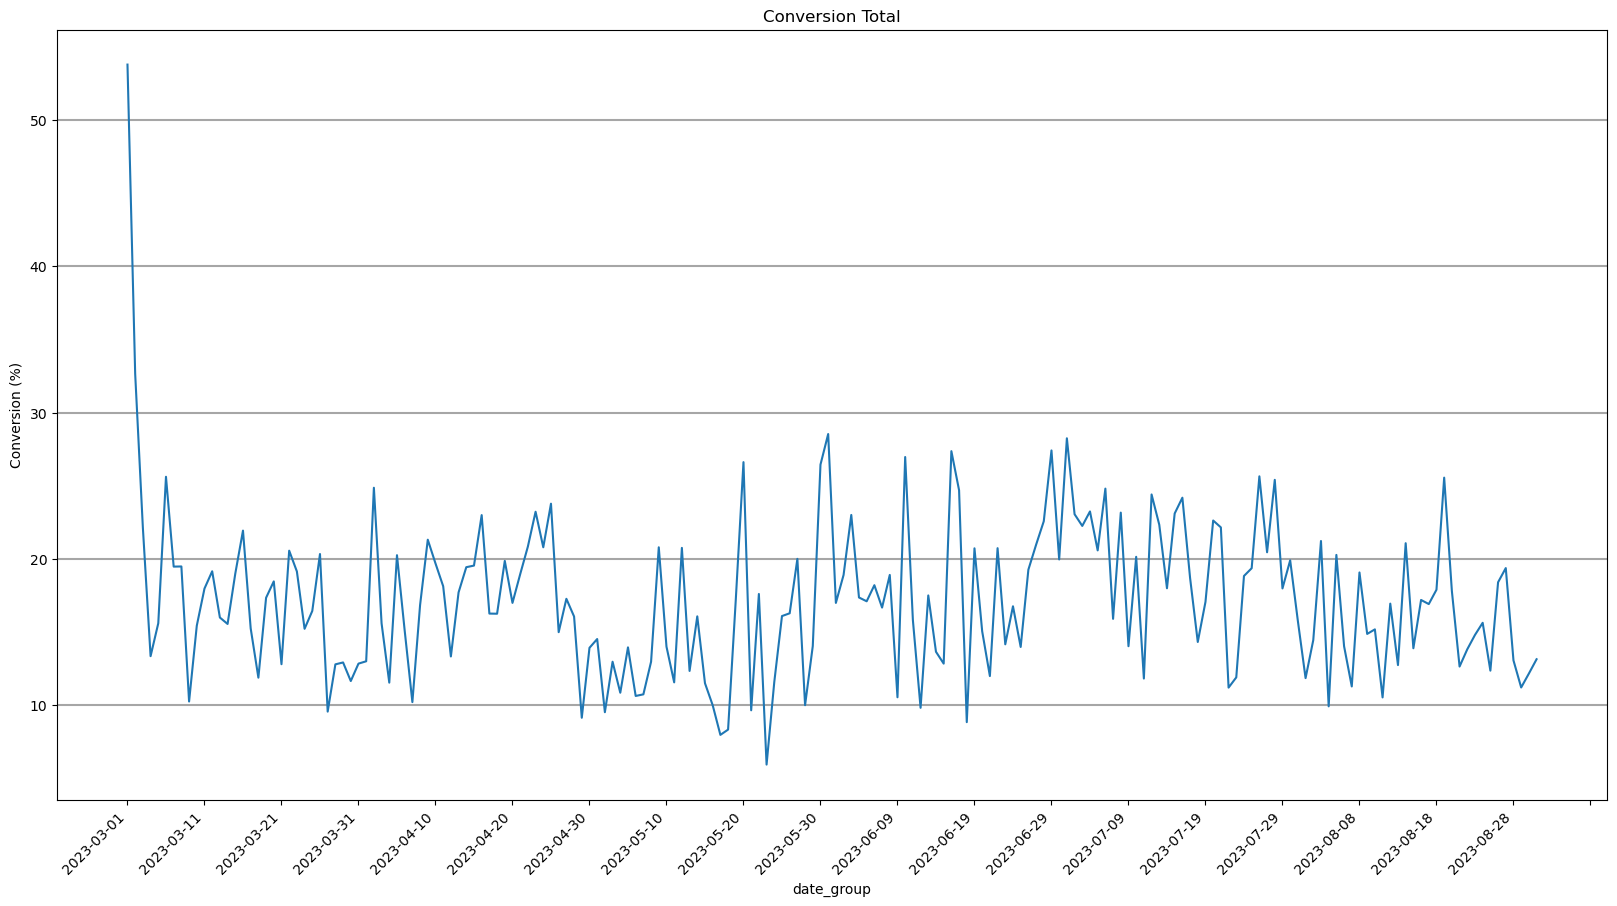

In [124]:
df_conversion_total = df_conversion.copy(deep=True)

grouped_df = df_conversion_total.groupby('date_group').agg({'visits': 'sum', 'registrations': 'sum'})

grouped_df['conversion'] = (grouped_df['registrations'] / grouped_df['visits'] * 100).round(2)

plt.figure(figsize=(20, 10))
plt.plot(grouped_df.index, grouped_df['conversion'], linestyle='-')

plt.title('Conversion Total')
plt.xlabel('date_group')
plt.ylabel('Conversion (%)')

plt.xticks(df_graf_registrations_grouped['date_group'][::7], rotation=45, ha='right')

plt.grid(which='major', axis='y', linestyle='-', linewidth=1.5, color='gray', alpha=0.7)

plt.gca().xaxis.set_major_locator(MultipleLocator(10))

plt.savefig('charts/conversion_total_chart.png')

plt.show()

### Стоимости реклам

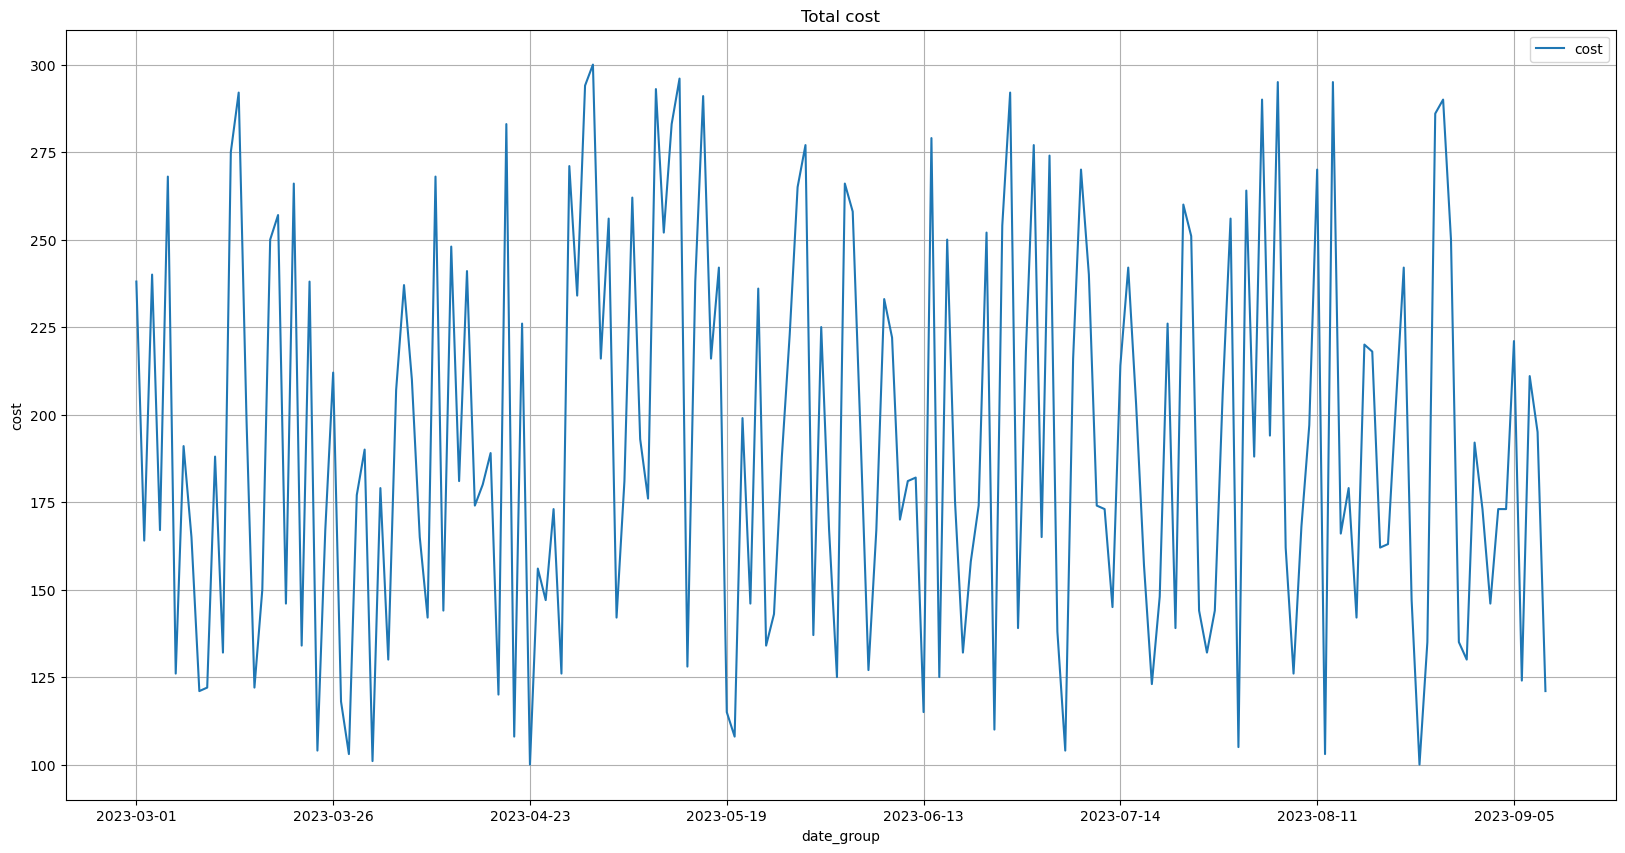

In [125]:
df_ads_total = df_ads.copy(deep=True)

df_ads_total = df_ads_total.groupby('date_group')['cost'].sum().reset_index()

df_ads_total.plot(x='date_group', y='cost', kind='line', linestyle='-', figsize=(20, 10))

plt.title('Total cost')
plt.xlabel('date_group')
plt.ylabel('cost')
plt.grid(True)

plt.savefig('charts/cost_total_chart.png')

plt.show()

### Визиты за весь период с цветовым выделением рекламной кампании

In [126]:
df_ads_group_1 = df_ads.copy(deep=True)
df_ads_group_1 = df_ads_group_1.groupby(['date_group', 'utm_source', 'utm_medium', 'campaign'], as_index=False)['cost'].sum()

df_graf_visit_grouped_1 = df_visit_grouped.copy(deep=True)
df_graf_visit_grouped_1 = df_graf_visit_grouped_1.groupby('date_group')['visits'].sum().reset_index()

df_graf_registrations_grouped_1 = df_registrations_grouped.copy(deep=True)

df_graf_registrations_grouped_1 = df_graf_registrations_grouped_1.groupby('date_group')['registrations'].sum().reset_index()

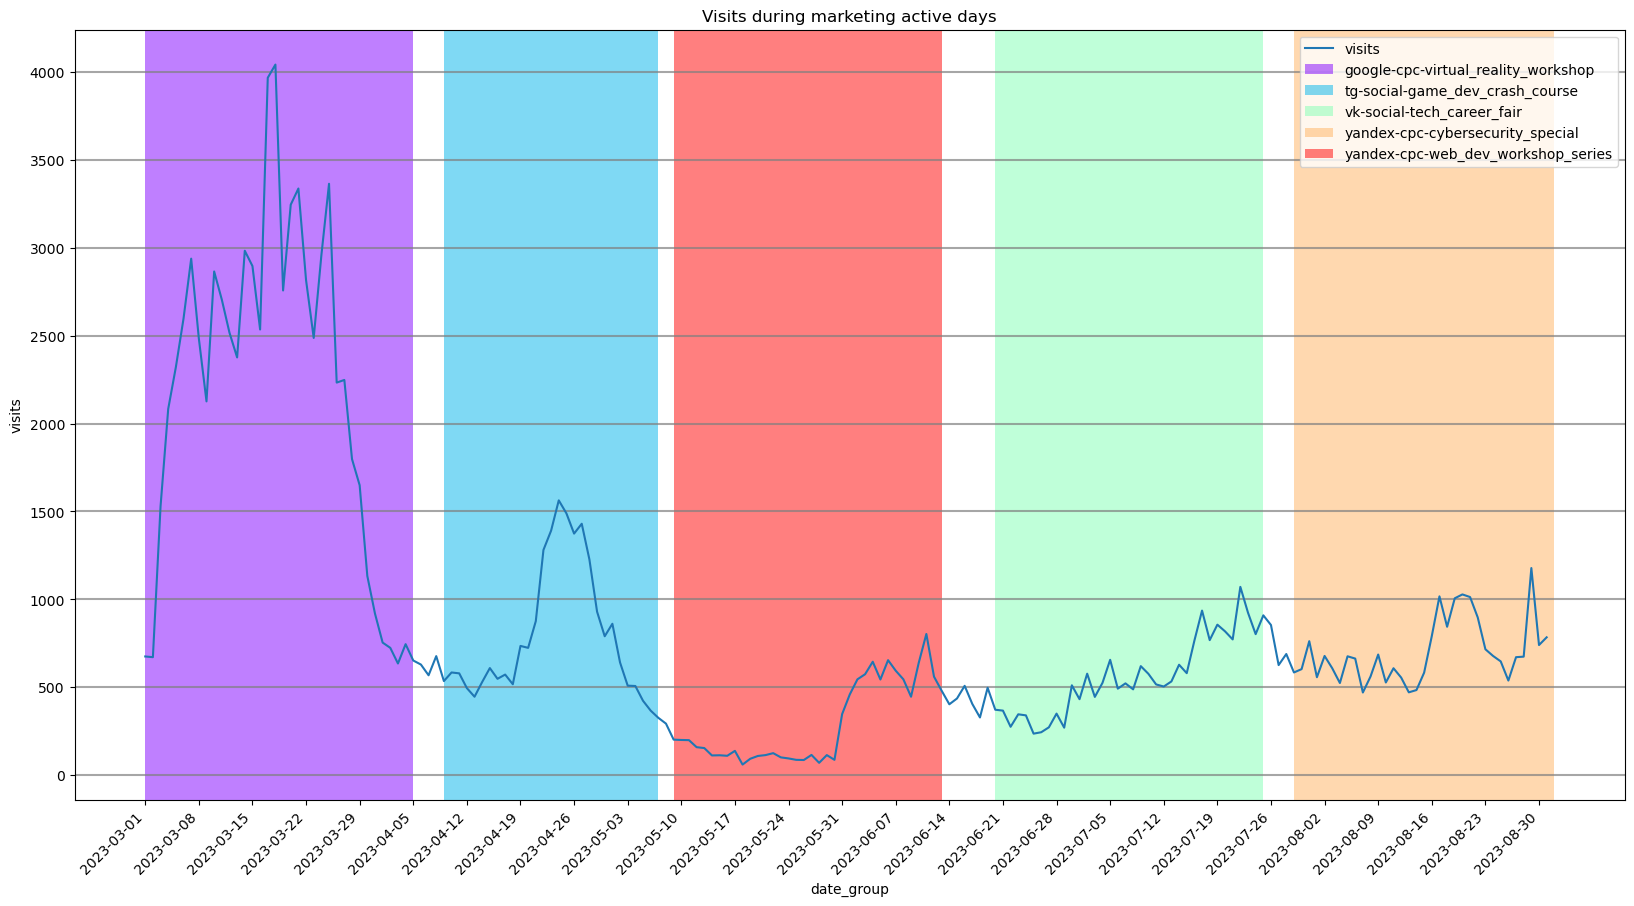

In [127]:
grouped_df = df_ads_group_1.groupby(['utm_source', 'utm_medium', 'campaign'])
result_df = pd.DataFrame(columns=['date_group_start', 'date_group_end', 'Ads'])

for group, group_df in grouped_df:
    start_date = group_df['date_group'].min()
    end_date = group_df['date_group'].max()
    ads_name = '-'.join(group)
    
    result_df = pd.concat([result_df, pd.DataFrame({'date_group_start': [start_date],
                                                    'date_group_end': [end_date],
                                                    'Ads': [ads_name]})], ignore_index=True)
    

grouped_df = df_ads_group_1.groupby(['utm_source', 'utm_medium', 'campaign'])
result_df = pd.DataFrame(columns=['date_group_start', 'date_group_end', 'Ads'])

for group, group_df in grouped_df:
    start_date = group_df['date_group'].min()
    end_date = group_df['date_group'].max()
    ads_name = '-'.join(group)
    
    result_df = pd.concat([result_df, pd.DataFrame({'date_group_start': [start_date],
                                                    'date_group_end': [end_date],
                                                    'Ads': [ads_name]})], ignore_index=True)

num_colors = len(result_df['Ads'].unique())
ads_colors = plt.cm.rainbow(np.linspace(0, 1, num_colors))

ads_color_dict = dict(zip(result_df['Ads'].unique(), ads_colors))

plt.figure(figsize=(20, 10))
plt.plot(df_graf_visit_grouped_1['date_group'], df_graf_visit_grouped_1['visits'], label='visits')

for index, row in result_df.iterrows():
    plt.axvspan(row['date_group_start'], row['date_group_end'], facecolor=ads_color_dict[row['Ads']], alpha=0.5, label=row['Ads'])

plt.grid(which='major', axis='y', linestyle='-', linewidth=1.5, color='gray', alpha=0.7)
plt.title('Visits during marketing active days')
plt.xlabel('date_group')
plt.ylabel('visits')
plt.xticks(df_graf_visit_grouped_1['date_group'][::7], rotation=45, ha='right')

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.savefig('charts/visits_during_marketing_active_days.png')

plt.show()

### Регистрации за весь период с цветовым выделением рекламной кампании

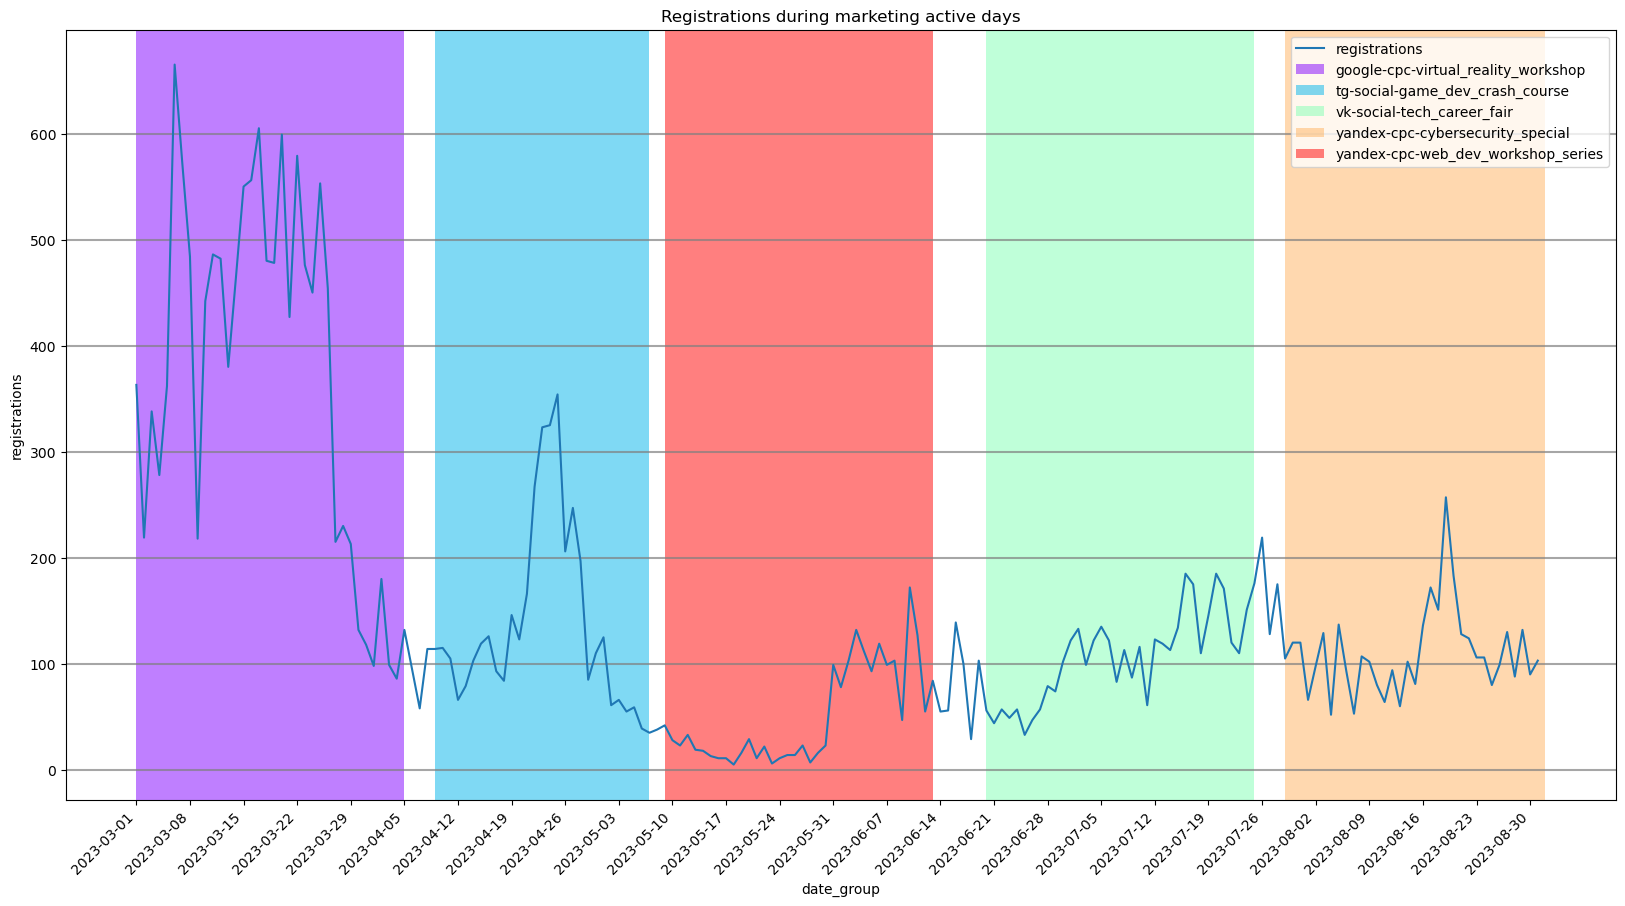

In [128]:
grouped_df = df_ads_group_1.groupby(['utm_source', 'utm_medium', 'campaign'])
result_df = pd.DataFrame(columns=['date_group_start', 'date_group_end', 'Ads'])

for group, group_df in grouped_df:
    start_date = group_df['date_group'].min()
    end_date = group_df['date_group'].max()
    ads_name = '-'.join(group)
    
    result_df = pd.concat([result_df, pd.DataFrame({'date_group_start': [start_date],
                                                    'date_group_end': [end_date],
                                                    'Ads': [ads_name]})], ignore_index=True)
    

grouped_df = df_ads_group_1.groupby(['utm_source', 'utm_medium', 'campaign'])
result_df = pd.DataFrame(columns=['date_group_start', 'date_group_end', 'Ads'])

for group, group_df in grouped_df:
    start_date = group_df['date_group'].min()
    end_date = group_df['date_group'].max()
    ads_name = '-'.join(group)
    
    result_df = pd.concat([result_df, pd.DataFrame({'date_group_start': [start_date],
                                                    'date_group_end': [end_date],
                                                    'Ads': [ads_name]})], ignore_index=True)

num_colors = len(result_df['Ads'].unique())
ads_colors = plt.cm.rainbow(np.linspace(0, 1, num_colors))

ads_color_dict = dict(zip(result_df['Ads'].unique(), ads_colors))

plt.figure(figsize=(20, 10))
plt.plot(df_graf_registrations_grouped_1['date_group'], df_graf_registrations_grouped_1['registrations'], label='registrations')

for index, row in result_df.iterrows():
    plt.axvspan(row['date_group_start'], row['date_group_end'], facecolor=ads_color_dict[row['Ads']], alpha=0.5, label=row['Ads'])

plt.grid(which='major', axis='y', linestyle='-', linewidth=1.5, color='gray', alpha=0.7)
plt.title('Registrations during marketing active days')
plt.xlabel('date_group')
plt.ylabel('registrations')
plt.xticks(df_graf_registrations_grouped_1['date_group'][::7], rotation=45, ha='right')

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.savefig('charts/registrations_during_marketing_active_days.png')

plt.show()

Данные к презентаци
Визиты по платформа недельный

In [129]:
'''graf_df_visit_grouped_week = df_visit_grouped.copy(deep=True)

graf_df_visit_grouped_week['date_group'] = pd.to_datetime(graf_df_visit_grouped_week['date_group'])

graf_df_visit_grouped_week['week'] = graf_df_visit_grouped_week['date_group'].dt.to_period('W')
grouped_data = graf_df_visit_grouped_week.groupby(['week', 'platform'])['visits'].sum().unstack()

fig, ax = plt.subplots(figsize=(20, 10))
grouped_data.plot(kind='bar', stacked=True, ax=ax)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.legend(title='Platform')
plt.xlabel('Week')
plt.ylabel('Visits')
plt.title('Weekly Visits by Platform')
#plt.xticks(rotation=45)
plt.savefig('charts/Weekly Visits by Platform.png', bbox_inches='tight')
plt.show()'''

"graf_df_visit_grouped_week = df_visit_grouped.copy(deep=True)\n\ngraf_df_visit_grouped_week['date_group'] = pd.to_datetime(graf_df_visit_grouped_week['date_group'])\n\ngraf_df_visit_grouped_week['week'] = graf_df_visit_grouped_week['date_group'].dt.to_period('W')\ngrouped_data = graf_df_visit_grouped_week.groupby(['week', 'platform'])['visits'].sum().unstack()\n\nfig, ax = plt.subplots(figsize=(20, 10))\ngrouped_data.plot(kind='bar', stacked=True, ax=ax)\n\nplt.grid(axis='y', linestyle='--', alpha=0.7)\n\nplt.legend(title='Platform')\nplt.xlabel('Week')\nplt.ylabel('Visits')\nplt.title('Weekly Visits by Platform')\n#plt.xticks(rotation=45)\nplt.savefig('charts/Weekly Visits by Platform.png', bbox_inches='tight')\nplt.show()"

Регистрация по платформам

In [130]:
'''graf_df_registrations_grouped_week = df_registrations_grouped.copy(deep=True)''
graf_df_registrations_grouped_week.head(1000000)'''

"graf_df_registrations_grouped_week = df_registrations_grouped.copy(deep=True)''\ngraf_df_registrations_grouped_week.head(1000000)"

In [131]:
'''graf_df_registrations_grouped_week = df_registrations_grouped.copy(deep=True)

graf_df_registrations_grouped_week['date_group'] = pd.to_datetime(graf_df_registrations_grouped_week['date_group'])

graf_df_registrations_grouped_week['week'] = graf_df_registrations_grouped_week['date_group'].dt.to_period('W')
grouped_data = graf_df_registrations_grouped_week.groupby(['week', 'platform'])['registrations'].sum().unstack()

fig, ax = plt.subplots(figsize=(20, 10))
grouped_data.plot(kind='bar', stacked=True, ax=ax)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.legend(title='Platform')
plt.xlabel('Week')
plt.ylabel('registrationss')
plt.title('Weekly registrationss by Platform')
#plt.xticks(rotation=45)
plt.savefig('charts/Weekly registrationss by Platform.png', bbox_inches='tight')
plt.show()'''

"graf_df_registrations_grouped_week = df_registrations_grouped.copy(deep=True)\n\ngraf_df_registrations_grouped_week['date_group'] = pd.to_datetime(graf_df_registrations_grouped_week['date_group'])\n\ngraf_df_registrations_grouped_week['week'] = graf_df_registrations_grouped_week['date_group'].dt.to_period('W')\ngrouped_data = graf_df_registrations_grouped_week.groupby(['week', 'platform'])['registrations'].sum().unstack()\n\nfig, ax = plt.subplots(figsize=(20, 10))\ngrouped_data.plot(kind='bar', stacked=True, ax=ax)\n\nplt.grid(axis='y', linestyle='--', alpha=0.7)\n\nplt.legend(title='Platform')\nplt.xlabel('Week')\nplt.ylabel('registrationss')\nplt.title('Weekly registrationss by Platform')\n#plt.xticks(rotation=45)\nplt.savefig('charts/Weekly registrationss by Platform.png', bbox_inches='tight')\nplt.show()"

In [132]:
'''df_graf_registration_type_copy = df_registrations.copy(deep=True)
df_graf_registration_platform_copy = df_registrations.copy(deep=True)

df_graf_registration_type_copy = df_graf_registration_type_copy.groupby('registration_type').size().reset_index(name='registration')
df_graf_registration_platform_copy = df_graf_registration_platform_copy.groupby('platform').size().reset_index(name='registration')

fig, ax = plt.subplots(1, 2, figsize=(20, 10))

wedges, texts, autotexts = ax[0].pie(df_graf_registration_type_copy['registration'], labels=df_graf_registration_type_copy['registration_type'], autopct='%1.1f%%', startangle=90)
ax[0].set_title('Registration by Type', fontsize=20)

for text, autotext in zip(texts, autotexts):
    text.set_fontsize(20)
    autotext.set_fontsize(20)

wedges, texts, autotexts = ax[1].pie(df_graf_registration_platform_copy['registration'], labels=df_graf_registration_platform_copy['platform'], autopct='%1.1f%%', startangle=90)
ax[1].set_title('Registration by Platform', fontsize=20)

for text, autotext in zip(texts, autotexts):
    text.set_fontsize(20)
    autotext.set_fontsize(20)

plt.savefig('charts/registration_type_platform_chart.png', bbox_inches='tight')

plt.show()
'''

"df_graf_registration_type_copy = df_registrations.copy(deep=True)\ndf_graf_registration_platform_copy = df_registrations.copy(deep=True)\n\ndf_graf_registration_type_copy = df_graf_registration_type_copy.groupby('registration_type').size().reset_index(name='registration')\ndf_graf_registration_platform_copy = df_graf_registration_platform_copy.groupby('platform').size().reset_index(name='registration')\n\nfig, ax = plt.subplots(1, 2, figsize=(20, 10))\n\nwedges, texts, autotexts = ax[0].pie(df_graf_registration_type_copy['registration'], labels=df_graf_registration_type_copy['registration_type'], autopct='%1.1f%%', startangle=90)\nax[0].set_title('Registration by Type', fontsize=20)\n\nfor text, autotext in zip(texts, autotexts):\n    text.set_fontsize(20)\n    autotext.set_fontsize(20)\n\nwedges, texts, autotexts = ax[1].pie(df_graf_registration_platform_copy['registration'], labels=df_graf_registration_platform_copy['platform'], autopct='%1.1f%%', startangle=90)\nax[1].set_title('Re

In [133]:
'''df_conversion_week = df_conversion.copy(deep=True)


df_conversion_week['date_group'] = pd.to_datetime(df_conversion_week['date_group'])

df_conversion_week_total = df_conversion_week.groupby(pd.Grouper(key='date_group', freq='W')).agg({
    'visits': 'sum',
    'registrations': 'sum'
})


df_conversion_week_total['conversion'] = (df_conversion_week_total['registrations'] / df_conversion_week_total['visits']) * 100

df_conversion_week_total = df_conversion_week_total.reset_index()

df_conversion_week_total.head(10000000)
'''

"df_conversion_week = df_conversion.copy(deep=True)\n\n\ndf_conversion_week['date_group'] = pd.to_datetime(df_conversion_week['date_group'])\n\ndf_conversion_week_total = df_conversion_week.groupby(pd.Grouper(key='date_group', freq='W')).agg({\n    'visits': 'sum',\n    'registrations': 'sum'\n})\n\n\ndf_conversion_week_total['conversion'] = (df_conversion_week_total['registrations'] / df_conversion_week_total['visits']) * 100\n\ndf_conversion_week_total = df_conversion_week_total.reset_index()\n\ndf_conversion_week_total.head(10000000)\n"

In [134]:
'''
plt.figure(figsize=(20, 10))
plt.plot(df_conversion_week_total['date_group'], df_conversion_week_total['conversion'], linestyle='-')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.xlabel('Date')
plt.ylabel('Conversion %')
plt.title('Conversion week')

plt.savefig('charts/conversion_week_chart.png', bbox_inches='tight')

plt.show()
'''

"\nplt.figure(figsize=(20, 10))\nplt.plot(df_conversion_week_total['date_group'], df_conversion_week_total['conversion'], linestyle='-')\n\nplt.grid(axis='y', linestyle='--', alpha=0.7)\n\nplt.xlabel('Date')\nplt.ylabel('Conversion %')\nplt.title('Conversion week')\n\nplt.savefig('charts/conversion_week_chart.png', bbox_inches='tight')\n\nplt.show()\n"